In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot 




# load the given features and labels in pandas data frame

npdata = pd.read_csv('C:/Hanumanji/PythonProjects/uvprojects/recommendationsystem1/train.csv')




In [ ]:
# use np array 
data = np.array(npdata) 

m,n = data.shape

# shuffle before splitting into dev and training sets
np.random.shuffle(data) 

# divide the data into training and test set

# test set flip training data (transpose) so that each column is an data set
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

# training set flip training data (transpose) so that each column is an data set
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
# normalize the training features ( otherwise gradient descent willl not converge)
X_train = X_train / 255    


In [3]:
# Function to Initilize parameters /weights

def init_params(hidden_size=10):

    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
                                     


In [4]:
# define reLU function

def ReLU(Z):
   return  np.maximum(0,Z)




def softmax(Z):
    Z_stable = Z - np.max(Z, axis=0, keepdims=True)  # subtract max for numerical stability
    exp_Z = np.exp(Z_stable)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

 
# forward propogation function



def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def deriv_ReLU(Z):
   return Z > 0


def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
   m= Y.size
   one_hot_Y = one_hot(Y)
   dZ2 = A2 - one_hot_Y
   dW2 = 1/m * dZ2.dot(A1.T)
   db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

   dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
   dW1 = 1/m * dZ1.dot(X.T)
   db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
   #db1 = 1/m * np.sum(dZ1)
   return  dW2, db2, dW1, db1 



def update_params(W1, b1, W2, b2, dW2, db2, dW1, db1, alpha):
   W1 = W1 - alpha * dW1
   b1 = b1 - alpha * db1

   W2 = W2 - alpha * dW2
   b2 = b2 - alpha * db2   
   return W1, b1, W2, b2

   


In [5]:
#This converts the softmax probabilities in A2 into class predictions
#For example, if:A2=[ 0.1,7​, .2 ] Then get_predictions(A2) would return: 1 , index of highest probability. Note indextr starts from 0.


def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations , hidden_size=10):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2





In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 700, 0)

Iteration:  0
[6 6 5 ... 5 6 5] [9 8 4 ... 7 9 5]
0.15321951219512195
Iteration:  50
[9 0 4 ... 8 9 8] [9 8 4 ... 7 9 5]
0.4946341463414634
Iteration:  100
[9 5 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.6530243902439025
Iteration:  150
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.7241463414634146
Iteration:  200
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.7604146341463415
Iteration:  250
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.7843414634146342
Iteration:  300
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.8014878048780488
Iteration:  350
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.8154878048780487
Iteration:  400
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.8256829268292682
Iteration:  450
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.8362926829268292
Iteration:  500
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.8429512195121951
Iteration:  550
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.8492926829268292
Iteration:  600
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.8540487804878049
Iteration:  650
[9 8 4 ... 7 9 5] [9 8 4 ... 7 9 5]
0.8584878048780488


In [17]:
import matplotlib.pyplot as plt

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    print("Current Image matrix:",current_image, current_image.shape )
    
    current_image = current_image.reshape((28, 28)) #* 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1
Current Image matrix: [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]

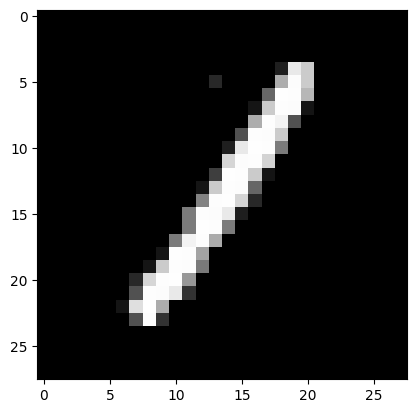

In [16]:
test_prediction(600, W1, b1, W2, b2)

In [176]:
# time to train

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 100, .1)

Iteration:  0
[0 6 2 ... 5 2 0] [8 2 5 ... 9 9 1]
0.05321951219512195
Iteration:  10
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927
Iteration:  20
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927
Iteration:  30
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927
Iteration:  40
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927
Iteration:  50
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927
Iteration:  60
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927
Iteration:  70
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927
Iteration:  80
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927
Iteration:  90
[1 1 1 ... 1 1 1] [8 2 5 ... 9 9 1]
0.11129268292682927


NameError: name 'W1' is not defined

In [ ]:
# A_0 = XT (INPUT DATA)


